# What is probability? A simulated introduction

In [3]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Probability

> To the pioneers such as Bernoulli, Bayes and Laplace, a probability represented a _degree-of-belief_ or plausibility; how much they thought that something was true, based on the evidence at hand. To the 19th century scholars, however, this seemed too vague and subjective an idea to be the basis of a rigorous mathematical theory. So they redefined probability as the _long-run relative frequency_ with which an event occurred, given (infinitely) many repeated (experimental trials). Since frequencies can be measured, probability was now seen as an objective tool for dealing with _random_ phenomena.

-- _Data Analysis, A Bayesian Tutorial_, Sivia & Skilling (p. 9)

Example of thinking about probability: 
- Knowing that a disease has a 70% rate of incidence in a population, we can calculate the probabilty of having 10 sick people, 9 sick people, 8 ... and so on, upon drawing 10 people randomly from the population.
- But given the data of how many sick people we have in a population, how can we calculate the rate? And how certain can we be of this rate? Or how likely is it a particular incidence rate?

Science mostly asks questions of the second form above & Bayesian Thinking provides a wondereful framework for answering such questions. We'll first explore questions of the 1st type using simulation.

### Simulating probabilities (Frequentist beginnings)

* Let's say that a disease has a prevalence of 50%, i.e. that 50% of the population have it. If we picked 1000 people at random from this population, how likely would it be to find a certain number of people with the disease?

We can simulate this using `numpy`'s random number generator.

To do so, first note we can use `np.random.rand()` to randomly select floats between 0 and 1 (c.f. uniform distribution). Below, we do so and plot a histogram:

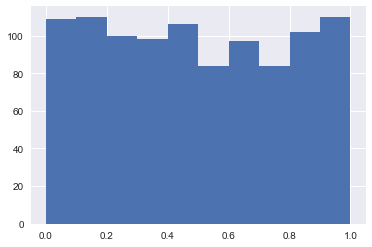

In [21]:
x = np.random.rand(1000)
plt.hist(x);

To then simulate the sampling from the population, we check whether each float was greater or less than 0.5. If greater than or equal to 0.5, we say the person is affected.

In [22]:
pop = x <= 0.5
aff = sum(pop)
f"Number of affected people = {aff}"

'Number of affected people = 523'

The proportion of people affected can be calculated as the total number of affected over the population size:

In [7]:
f"Proportion affected = {aff/len(pop)}"

'P(affected) = 0.513'

_Discussion_: Did you get the same answer as your neighbour?

**Up for discussion:** Let's say that all you had was this data and you wanted to figure out the prevalence (probability). 

* What would your estimate me?
* Bonus points: how confident would you be of your estimate?

### Hands-on: more prevalent disease

Use random sampling to simulate how many are affected when the prevalence is 0.7. How many are affected? What proportion?

In [20]:
# Solution
pop = x <= 0.7
aff = sum(pop)
print(f"Number of affected people = {aff}")
print(f"Proportion affected = {aff/len(pop)}")

Number of affected people = 694
Proportion affected = 0.694


_Discussion point_: This model is know as the bias coin flip. Can you see why?

### Galapagos finch beaks

You can also calculate probabilities with real-world data. Here we import a dataset of Finch beak measurements from the Galápagos islands. You can find the data [here](https://datadryad.org/resource/doi:10.5061/dryad.9gh90).

In [9]:
# Import and view head of data
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [10]:
# Store lengths in a pandas series
lengths = df_12.blength

* What proportion of birds have a beak length > 10 ?

In [15]:
p = (sum(lengths > 10))/len(lengths)
p

0.8508064516129032

### Why do this here? Perhaps remove

We can also calculate this in the simulation/hacker statistics way by drawing random samples (with replacement) from the data, seeing how many lengths are > 10 and calculating the proportion:

In [9]:
n_samples = 10000
sum(np.random.choice(lengths,n_samples, replace=True) > 10)/n_samples

0.8496

## Another way to simulate coin-flips

Above you have used the uniform distribution to sample from a series of biased coin flips. I want to introduce you to another distribution that you can also use to do so: the **binomial distribution**.

The **binomial distribution** with parameters $n$ and $p$ is defined as the probability distribution of

> the number of heads seen when flipping a coin $n$ times when  with $p(heads)=p$.

We'll now use the binomial distribution to answer the same question as above:
* If P(heads) = 0.7 and you flip the coin ten times, how many heads will come up?

We'll also set the seed to ensure reproducible results>

In [24]:
# Set seed
np.random.seed(seed=42)

# Simulate one run of flipping the biased coin 10 times
np.random.binomial(10,0.7)

8

### Simulating many times to get the distribution

In the above, we have simulated the scenario once. But this only tells us one potential outcome. To see how likely it is to get $n$ heads, for example, we need to simulate it a lot of times and check what proportion ended up with $n$ heads.

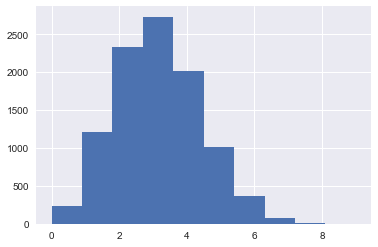

In [11]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = np.random.binomial(10,0.3,10000)

# Plot histogram of results
plt.hist(x);

* Group chat: what do you see in the above?

## Hands-on

- If I flip a biased coin (P(H)=0.3) 20 times, what is the probability of 5 or more heads?

In [12]:
# Solution
sum(np.random.binomial(10,0.3,10000) >= 5)/10000

0.1491

- If I flip a fair coin 20 times, what is the probability of 5 or more heads?

In [13]:
sum(np.random.binomial(20,0.5,10000) >= 5)/10000

0.9943

- Plot the histogram of number of heads of the following experiment: flipping a fair coin 10 times.

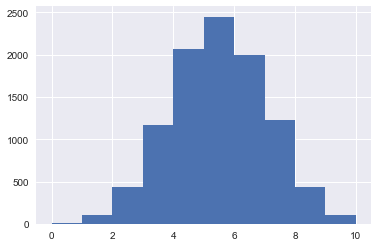

In [14]:
# Plot histogram 
x = np.random.binomial(10,0.5,10000)
plt.hist(x);

_Note:_ Mention distinction between PDF & PMF.

## Joint Probability

We have really already encountered joint probabilities above: $P(A,B)$ is the probability two events $A$ and $B$ _both_ occurring:
* For example, getting two heads in a row.
If $A$ and $B$ are independent, then $P(A,B)=P(A)P(B)$

### HANDS-ON

Verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads):

0.25


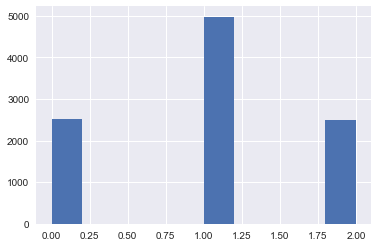

In [32]:
# Calculate P(A,B)
x_0 = np.random.binomial(2,0.5,10000)
p_ab = sum(x_0==2)/len(x_0)
plt.hist(x_0);
print(p_ab)

In [33]:
x_1 = np.random.binomial(1,0.5,10000)
x_2 = np.random.binomial(1,0.5,10000)
p_a = sum(x_1 == 1)/len(x_1)
p_b = sum(x_2 == 1)/len(x_2)
p_a*p_b

0.24628453000000003

## HANDS-ON: joint probability for birds

(PERHAPS REMOVE AS THIS IS PROPORTION, NOT PROBABILITY). OTHER OPTION: STATE THERE WE'RE USING PROPORTION AS PROXY FOR PROBABILITY (IT'S MLE).

What is the probability that two randomly selected birds have beak depths over 10 ?

In [35]:
p_a = (sum(lengths > 10))/len(lengths)
p_b = (sum(lengths > 10))/len(lengths)
p_a*p_b

0.7238716181061394

* Calculate the joint probability using the resampling method, that is, by drawing random samples (with replacement) from the data. First calculate $P(A)P(B)$:

In [19]:
n_samples = 10000
p_a = sum(np.random.choice(lengths,n_samples, replace=True) > 10)/n_samples
p_b = sum(np.random.choice(lengths,n_samples, replace=True) > 10)/n_samples
p_a*p_b

0.72037626

Now calculate $P(A,B)$:

In [36]:
n_samples = 100000
samples = np.random.choice(lengths,(n_samples,2), replace=True)
_ = samples > (10,10)
p_ab = sum(np.prod(_, axis=1))/n_samples
p_ab

0.72552

## Conditional Probability

Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of $A$, knowing that $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a finch beak having depth $<10$, knowing that the finch of of species 'fortis'?"

### Example: conditional probability for birds

1. What is the probability of a finch beak having depth > 10 ?
2. What if we know the finch is of species 'fortis'?
3. What if we know the finch is of species 'scandens'?

In [21]:
sum(df_12.blength > 10)/len(df_12)

0.8508064516129032

In [22]:
sum(df_12.loc[df_12.species == 'fortis'].blength > 10)/len(df_12.loc[df_12.species == 'fortis'])

0.6942148760330579

In [23]:
sum(df_12.loc[df_12.species == 'scandens'].blength > 10)/len(df_12.loc[df_12.species == 'scandens'])

1.0

Conditional and joint probabilites are related by the following:
$$ P(A,B) = P(A|B)P(B)$$

### Hands on example: drug testing

**Question:** Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

In the spirit of this workshop, it's now time to harness your computational power and the intuition of simulation to solve this!

In [54]:
# Take 10,000 subjects
n = 100000
# Sample for number of users, non-users
users = np.random.binomial(n,0.005,1) 
non_users = n - users

In [55]:
# How many of these users tested +ve ?
u_pos = np.random.binomial(users,0.99)
# How many of these non-users tested +ve ?
non_pos = np.random.binomial(non_users,0.01)

In [56]:
# how many of those +ve tests were for users?
u_pos/(u_pos+non_pos)

array([0.31442242])

_Discussion_: What you have been able to do here is to solve the following problem: you knew $P(+|user)=0.99$, but you were trying to figure out $P(user|+)$. Is the answer what you expected?

_Note_: This is related to the serious scientific challenge posed at the beginning here: if you know the underlying parameters/model, you can figure out the distribution and result, but often we have only the experimental result and we're trying to figure out the most appropriate model and parameters.

It is Bayes Theorem that lets us move between these.

## Bayes Theorem

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

Bayes Theorem can be used to analytically derive the solution to the 'drug testing' example above as follows.

From Bayes Theorem, 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+)}$$



We can expand the denominator here into 

$$P(+)  = P(+,user) + P(+,non-user) $$

so that

$$ P(+)=P(+|user)P(user) + P(+|non-user)P(non-user)$$

and 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+|user)P(user) + P(+|non-user)P(non-user)}$$.

Calculating this explicitly yields

$$P(user|+) = \frac{0.99\times 0.005}{0.99\times 0.005 + 0.01\times 0.995} = 0.332 $$

This means that if an individual tests positive, there is still only a 33.2% chance that they are a user! This is because the number of non-users is so high compared to the number of users.

### Hands-on: discover the above using simulation

Coming up: from Bayes Theorem to Bayesian Inference!